In [8]:
# CREATING THE TABLE
import pandas as pd
import sqlite3
conn = sqlite3.connect('sqlhw.db')
conn.execute('''
CREATE TABLE IF NOT EXISTS sensor (
	id CHAR(3) PRIMARY KEY NOT NULL,
	name CHAR(50) NOT NULL 
);''')

conn.execute('''
CREATE TABLE data (
	id CHAR(3) NOT NULL,
	date_time datetime NOT NULL,
	pm INTEGER NOT NULL ,
	temp INTEGER NOT NULL 
		CONSTRAINT fk_dat_ID REFERENCES sens(sen_ID));''')
conn.commit()
print("Table created successfully");

Table created successfully


In [56]:
#add sensor data
conn.execute("INSERT INTO sensor(id,name) VALUES('1','SENSOR 1');")
conn.execute("INSERT INTO sensor(id,name) VALUES('2','SENSOR 2');")
conn.execute("INSERT INTO sensor(id,name) VALUES('3','SENSOR 3');")
conn.execute("INSERT INTO sensor(id,name) VALUES('4','SENSOR 4');")
conn.execute("INSERT INTO sensor(id,name) VALUES('5','SENSOR 5');")

In [57]:
pd.read_sql_query("SELECT * FROM sensor", conn)

,id,name
0,1,SENSOR 1
1,2,SENSOR 2
2,3,SENSOR 3
3,4,SENSOR 4
4,5,SENSOR 5


In [58]:
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('1','10/7/2019 14:00:00',117,40);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('1','10/7/2019 15.00:00',118,41);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('1','10/7/2019 16.00:00',98,42);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('2','10/7/2019 14.00:00',120,43);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('2','10/7/2019 15.00:00',112,44);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('2','10/7/2019 16.00:00',99,45);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('3','10/7/2019 14.00:00',123,39);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('3','10/7/2019 15.00:00',45,38);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('3','10/7/2019 16.00:00',46,37);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('4','10/7/2019 14.00:00',121,36);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('4','10/7/2019 15.00:00',135,33);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('4','10/7/2019 16.00:00',140,36);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('5','10/7/2019 14.00:00',76,39);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('5','10/7/2019 15.00:00',132,45);")
conn.execute("INSERT INTO data(id,date_time,pm,temp) VALUES('5','10/7/2019 16.00:00',99,34);")

In [59]:
pd.read_sql_query("SELECT * FROM data", conn)

,id,date_time,pm,temp
0,1,10/7/2019 14:00:00,117,40
1,1,10/7/2019 15.00:00,118,41
2,1,10/7/2019 16.00:00,98,42
3,2,10/7/2019 14.00:00,120,43
4,2,10/7/2019 15.00:00,112,44
5,2,10/7/2019 16.00:00,99,45
6,3,10/7/2019 14.00:00,123,39
7,3,10/7/2019 15.00:00,45,38
8,3,10/7/2019 16.00:00,46,37
9,4,10/7/2019 14.00:00,121,36


In [52]:
#จาก error และ การ research เห็นได้ว่าตัว library sqlite3 มีข้อจำกัดเนื่องจากไม่มี function right and full outer join ทำให้ใช้คำสั่งนี้ไม่ได้
# reference https://phabricator.wikimedia.org/T41064


#join table with mutual id
pd.read_sql_query('''SELECT s.id,s.name,d.date_time,d.pm,d.temp 
FROM sensor s
FULL OUTER JOIN data d 
ON s.id = d.id 
ORDER BY s.name asc;''', conn)



DatabaseError: Execution failed on sql 'SELECT s.id,s.name,d.date_time,d.pm,d.temp 
FROM sensor s
FULL OUTER JOIN data d 
ON s.id = d.id 
ORDER BY s.name asc;': RIGHT and FULL OUTER JOINs are not currently supported

In [60]:
#showing 2 table as 1
pd.read_sql_query('''SELECT s.id,s.name,d.date_time,d.pm,d.temp 
FROM sensor s, data d 
WHERE s.id=d.id 
ORDER BY name asc''', conn)

,id,name,date_time,pm,temp
0,1,SENSOR 1,10/7/2019 14:00:00,117,40
1,1,SENSOR 1,10/7/2019 15.00:00,118,41
2,1,SENSOR 1,10/7/2019 16.00:00,98,42
3,2,SENSOR 2,10/7/2019 14.00:00,120,43
4,2,SENSOR 2,10/7/2019 15.00:00,112,44
5,2,SENSOR 2,10/7/2019 16.00:00,99,45
6,3,SENSOR 3,10/7/2019 14.00:00,123,39
7,3,SENSOR 3,10/7/2019 15.00:00,45,38
8,3,SENSOR 3,10/7/2019 16.00:00,46,37
9,4,SENSOR 4,10/7/2019 14.00:00,121,36


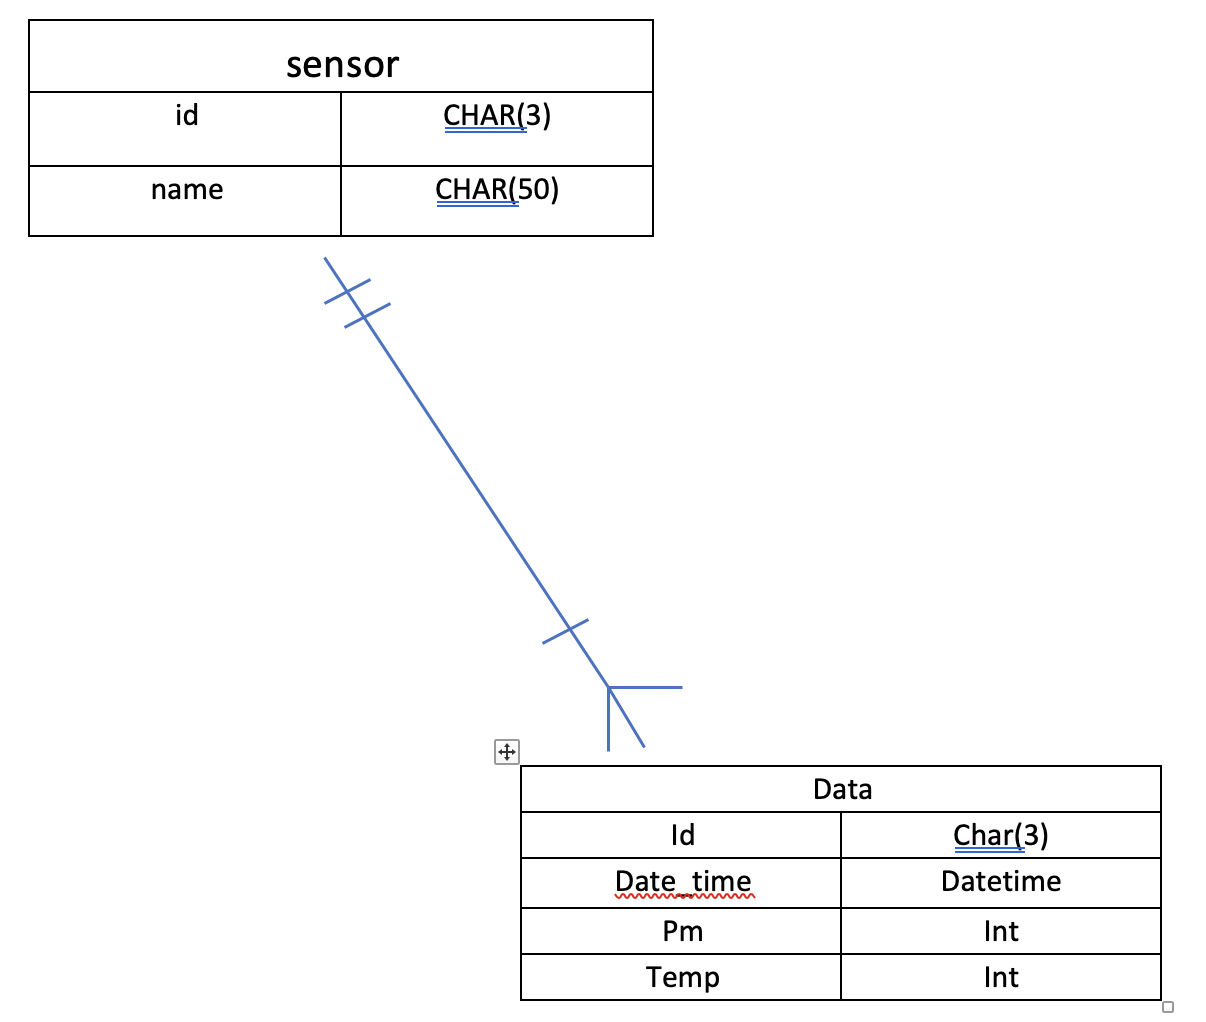